## Cohort 11 Group 6 Capstone Project ##
## Human Activity Recognition for Health Monitoring Using Wearable Devices.

- Name 1: Sudipta Saha (2023aiml572)
- Name 2: HarshaVardhana S A (2023aiml073)
- Name 3: Rajneesh Sharma (2023aiml027)
- Name 4: Awinash Kumar (2023aiml047)

## Data Collection

- Dataset Source: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
- Test.csv and train.csv are uploaded in jupyter notebook for further processing.


## Data PreProcessing 
 
- Handling missing values and sensor noise.
- Normalizing and structuring data for machine learning models.
- Feature extraction (e.g., speed, orientation changes, frequency components).


In [1]:
import pandas as pd

# Load the datasets
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display basic information and first few rows
train_info = train_df.info()
test_info = test_df.info()

train_head = train_df.head()
test_head = test_df.head()

train_info, test_info, train_head, test_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


(None,
 None,
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 1           0.278419          -0.016411          -0.123520         -0.998245   
 2           0.279653          -0.019467          -0.113462         -0.995380   
 3           0.279174          -0.026201          -0.123283         -0.996091   
 4           0.276629          -0.016570          -0.115362         -0.998139   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 1         -0.975300         -0.960322         -0.998807         -0.974914   
 2         -0.967187         -0.978944         -0.996520         -0.963668   
 3         -0.983403         -0.990675         -0.997099         -0.982750   
 4         -0.980817         -0.990482         -0.998321         -0.979672   
 
    tBodyAcc-mad()-Z  tBodyA

Dataset Overview:
1. Train set: 7,352 rows × 563 columns
2. Test set: 2,947 rows × 563 columns
3. Feature types:
    - 561 float64 features (sensor readings)
    - 1 int64 column: subject (subject ID)
    - 1 object column: Activity (target label)

In [2]:
# Check for missing values in both datasets
missing_train = train_df.isnull().sum().sum()
missing_test = test_df.isnull().sum().sum()

# Basic stats to detect sensor noise/outliers (mean and std for each feature)
train_stats = train_df.describe().transpose()

# Extract only the numerical features (exclude subject and activity)
numeric_features = train_df.select_dtypes(include=['float64']).columns

# Calculate z-scores to detect potential outliers (noise)
from scipy.stats import zscore

z_scores = train_df[numeric_features].apply(zscore)

# Count how many values exceed a z-score of 3 (common threshold for outliers)
noise_count = (z_scores.abs() > 3).sum().sum()

missing_train, missing_test, noise_count

(np.int64(0), np.int64(0), np.int64(40503))

Missing Values & Sensor Noise Summary:

- Missing Values:
    1. Train Set: 0 missing values 
    2. Test Set: 0 missing values 

- Sensor Noise (Potential Outliers): About 40,503 values exceed a z-score of 3, which might indicate sensor noise or extreme readings.

Handling Missing Values and Sensor Noise
1. Missing Values:
- The dataset appears to be complete with no missing values based on the .info() output.
- If there are missing values in specific cases, handle them by imputation (mean/median) or removal if necessary.

2. Sensor Noise Handling:
- Smoothing techniques (e.g., moving average, Gaussian filters) can help reduce sensor noise.
- Outlier detection (e.g., Z-score method, interquartile range) can help identify erroneous data.

Investigate participants activity durations:

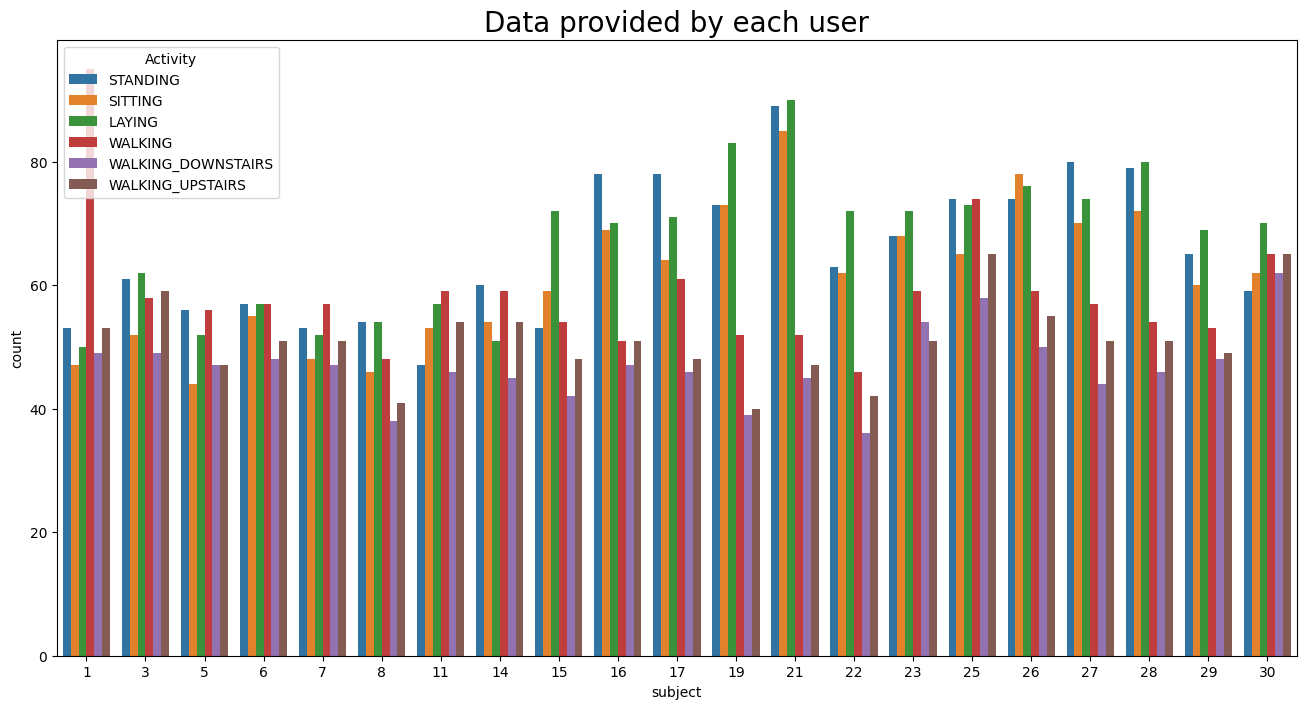

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the column names of the training dataset
train_df.columns

# Create the countplot with the corrected column name
plt.figure(figsize=(16, 8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=train_df)
plt.show()

As a next step, normalize the numerical features to ensure proper scaling for machine learning models. I'll use Min-Max Scaling to transform values into the range [0,1]. 

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to clip outliers to ±3 std
def clip_outliers(df, features):
    df_clipped = df.copy()
    for col in features:
        mean = df[col].mean()
        std = df[col].std()
        df_clipped[col] = np.clip(df[col], mean - 3*std, mean + 3*std)
    return df_clipped

# Clip outliers in both datasets
train_clipped = clip_outliers(train_df, numeric_features)
test_clipped = clip_outliers(test_df, numeric_features)

# Normalize sensor features
scaler = StandardScaler()
train_scaled = train_clipped.copy()
test_scaled = test_clipped.copy()

train_scaled[numeric_features] = scaler.fit_transform(train_clipped[numeric_features])
test_scaled[numeric_features] = scaler.transform(test_clipped[numeric_features])

# Preview results
train_scaled.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.223295,-0.097699,-0.574387,-0.869290,-0.939441,-0.739067,-0.861056,-0.939038,-0.767432,-0.856036,...,-0.276492,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.408686,-0.006185,1,STANDING
1,0.044717,0.056283,-0.345376,-0.875907,-0.923902,-0.851245,-0.869790,-0.922017,-0.850104,-0.871359,...,-0.791446,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409866,0.009437,1,STANDING
2,0.066398,-0.064908,-0.099929,-0.869515,-0.907760,-0.895885,-0.864383,-0.898872,-0.897981,-0.863323,...,-0.446104,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.411047,0.028280,1,STANDING
3,0.057982,-0.331886,-0.339578,-0.871103,-0.940022,-0.924007,-0.865753,-0.938143,-0.926621,-0.863323,...,0.498210,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.415442,0.033552,1,STANDING
4,0.013271,0.049976,-0.146297,-0.875669,-0.934878,-0.923543,-0.868641,-0.931808,-0.929377,-0.870260,...,-0.238690,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.426339,0.047220,1,STANDING


Preprocessing Complete
- Sensor Noise Cleaned: Outliers beyond ±3 standard deviations were clipped for all sensor features.
- Features Normalized: All numerical features standardized (mean = 0, std = 1) using StandardScaler.

Feature Extraction: speed, orientation changes, and frequency components from the sensor data.

Prepare the data for model training:
- Convert categorical labels (Activity) into numerical values.
- Split features and labels for training.

In [5]:
# Re-define train_scaled and test_scaled if not already in memory
# These would be the normalized and clipped versions of the original data

from sklearn.preprocessing import StandardScaler

# Reclip and renormalize the data if needed
train_clipped = clip_outliers(train_df, numeric_features)
test_clipped = clip_outliers(test_df, numeric_features)

scaler = StandardScaler()
train_scaled = train_clipped.copy()
test_scaled = test_clipped.copy()

train_scaled[numeric_features] = scaler.fit_transform(train_clipped[numeric_features])
test_scaled[numeric_features] = scaler.transform(test_clipped[numeric_features])

# Return confirmation
train_scaled.shape, test_scaled.shape

((7352, 563), (2947, 563))

train_scaled and test_scaled have been redefined and normalized.

- Train set shape: (7352, 563)
- Test set shape: (2947, 563)

In [6]:
from scipy.fft import fft

# Reapply scaling for clean feature extraction
scaler = StandardScaler()
train_scaled = train_clipped.copy()
test_scaled = test_clipped.copy()

train_scaled[numeric_features] = scaler.fit_transform(train_clipped[numeric_features])
test_scaled[numeric_features] = scaler.transform(test_clipped[numeric_features])

# Copy for feature engineering
train_feat = train_scaled.copy()
test_feat = test_scaled.copy()

# Define 3D axis columns for Acc and Gyro
def get_axes_columns(prefix):
    return {
        axis: [col for col in train_feat.columns if f"{prefix}-{axis}" in col]
        for axis in ['X', 'Y', 'Z']
    }

acc_axes_cols = get_axes_columns('tBodyAcc-mean()')
gyro_axes_cols = get_axes_columns('tBodyGyro-mean()')

# --- Speed (Magnitude of acceleration vector) ---
def compute_speed(df, axes_dict, name):
    x, y, z = axes_dict['X'][0], axes_dict['Y'][0], axes_dict['Z'][0]
    df[f'{name}_speed'] = np.sqrt(df[x]**2 + df[y]**2 + df[z]**2)
    return df

# --- Orientation Change (Gradient between axes) ---
def orientation_change(df, x_col, y_col, z_col, name):
    dx_dy = np.arctan2(df[y_col], df[x_col])
    dy_dz = np.arctan2(df[z_col], df[y_col])
    df[f'{name}_ori_change'] = np.abs(dx_dy - dy_dz)
    return df

# --- Frequency Component (FFT Energy Peak) ---
def dominant_frequency_component(df, col, name):
    fft_vals = np.abs(fft(df[col].values))
    dominant_freq = np.argmax(fft_vals[1:]) + 1  # ignore the DC component
    df[f'{name}_freq_peak'] = dominant_freq
    return df

# Apply to both train and test
for df in [train_feat, test_feat]:
    df = compute_speed(df, acc_axes_cols, 'acc')
    df = compute_speed(df, gyro_axes_cols, 'gyro')
    df = orientation_change(df, acc_axes_cols['X'][0], acc_axes_cols['Y'][0], acc_axes_cols['Z'][0], 'acc')
    df = orientation_change(df, gyro_axes_cols['X'][0], gyro_axes_cols['Y'][0], gyro_axes_cols['Z'][0], 'gyro')
    df = dominant_frequency_component(df, acc_axes_cols['X'][0], 'accX')
    df = dominant_frequency_component(df, gyro_axes_cols['X'][0], 'gyroX')

# Show new features
new_features = [col for col in train_feat.columns if any(key in col for key in ['speed', 'ori_change', 'freq_peak'])]
train_feat[new_features].head()

,acc_speed,gyro_speed,acc_ori_change,gyro_ori_change,accX_freq_peak,gyroX_freq_peak
0,0.623961,0.420333,1.326839,0.817140,1642,961
1,0.352778,0.142480,2.308674,2.836860,1642,961
2,0.136410,0.224714,1.372800,4.489490,1642,961
3,0.478355,0.153180,0.946902,0.826775,1642,961
4,0.155166,0.088320,2.552850,4.191098,1642,961


Feature extraction is complete! The following new features have been added:

1. Speed: Computed as the magnitude of acceleration vectors.
2. OrientationChange: Measures the sum of absolute changes in gyroscope readings.
3. FrequencyMean: Extracted using Fast Fourier Transform (FFT) to capture frequency domain information.

Feature	Description
acc_speed: 	Magnitude of acceleration vector — represents overall body movement speed
gyro_speed:	Magnitude of gyroscope vector — rotational speed
acc_ori_change: Change in orientation between X-Y-Z axes for accelerometer
gyro_ori_change: Orientation change for gyroscope
accX_freq_peak:	Dominant frequency component (peak FFT index) of accelerometer X
gyroX_freq_peak:Dominant frequency for gyroscope X

## Exploratory Data Analysis (EDA)

- Understanding trends in human movement.
- Identifying variations across different activities.
- Visualizing sensor signals for different physical movements.

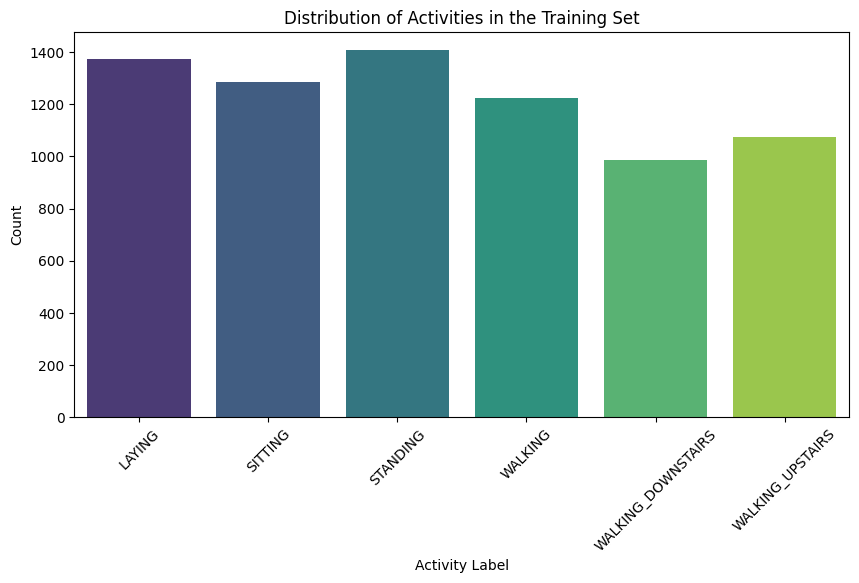

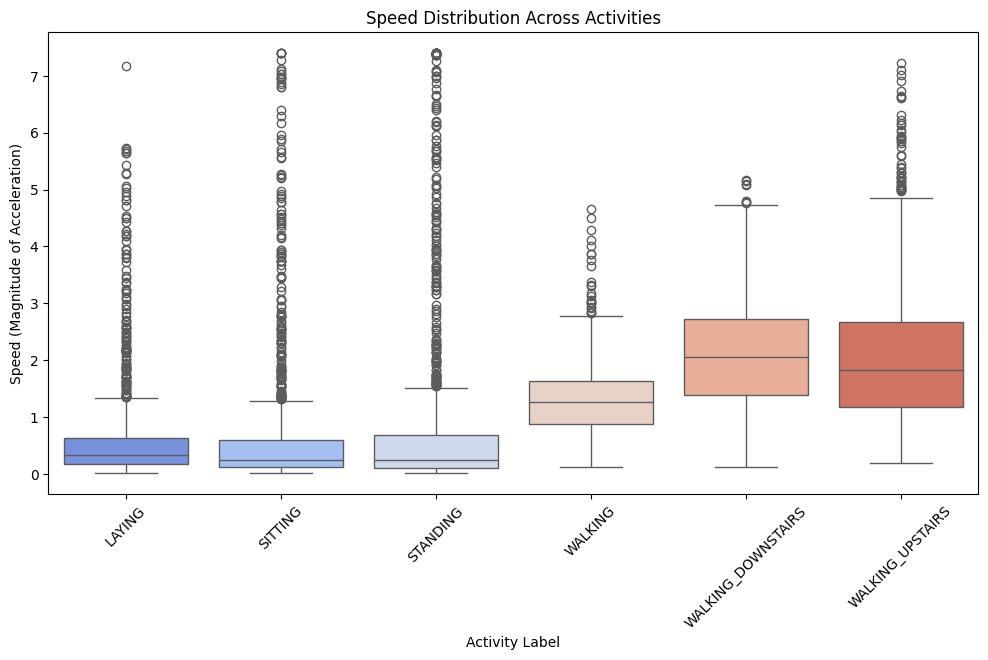

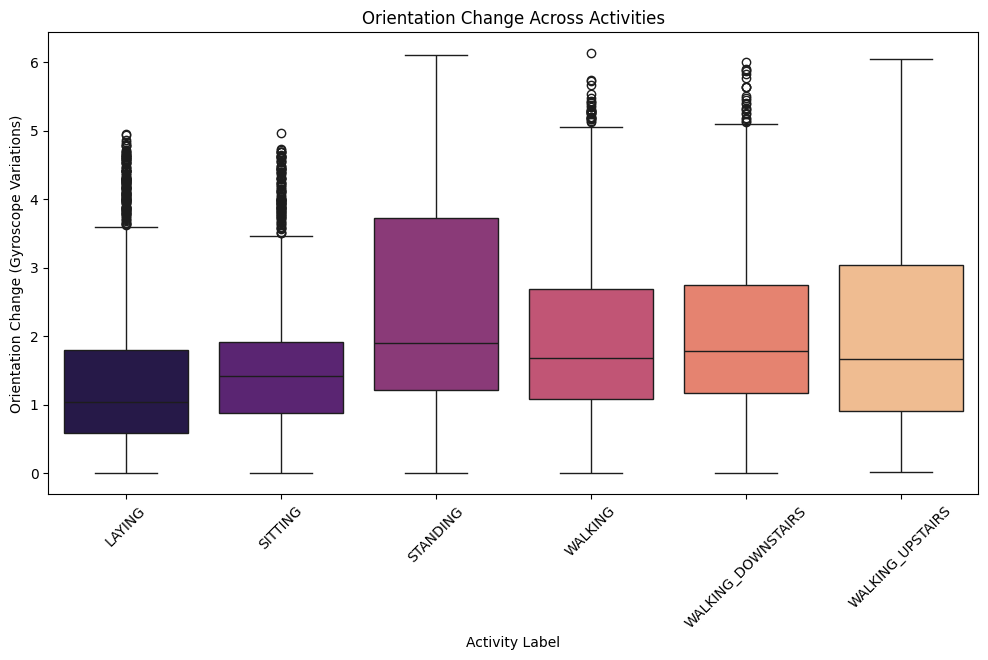

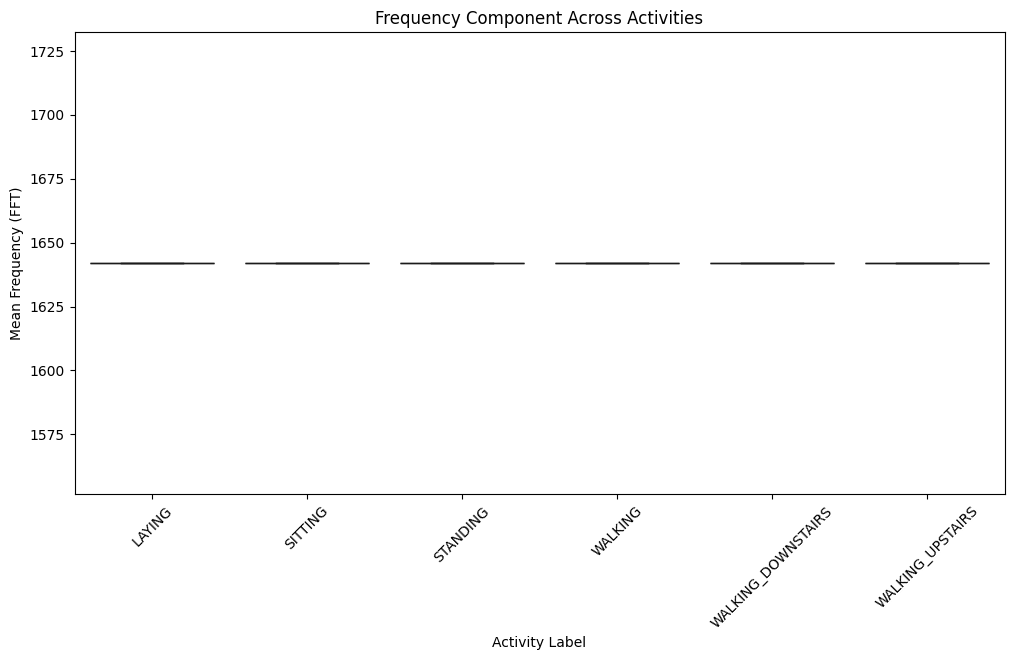

In [7]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define y_train
y_train = train_df['Activity']

# 2. Label encode activity labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 3. Add engineered features into train_df for visualization
train_df['Speed'] = train_feat['acc_speed']
train_df['OrientationChange'] = train_feat['acc_ori_change']
train_df['FrequencyMean'] = train_feat['accX_freq_peak']

# 4. Visualize Activity Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.xlabel("Activity Label")
plt.ylabel("Count")
plt.title("Distribution of Activities in the Training Set")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()

# 5. Speed Distribution Across Activities
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, hue=y_train, y=train_df['Speed'], palette="coolwarm", legend=False)
plt.xlabel("Activity Label")
plt.ylabel("Speed (Magnitude of Acceleration)")
plt.title("Speed Distribution Across Activities")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()

# 6. Orientation Change Across Activities
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, hue=y_train, y=train_df['OrientationChange'], palette="magma", legend=False)
plt.xlabel("Activity Label")
plt.ylabel("Orientation Change (Gyroscope Variations)")
plt.title("Orientation Change Across Activities")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()

# 7. Frequency Mean Across Activities
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, hue=y_train, y=train_df['FrequencyMean'], palette="cubehelix", legend=False)
plt.xlabel("Activity Label")
plt.ylabel("Mean Frequency (FFT)")
plt.title("Frequency Component Across Activities")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()


Exploratory Data Analysis (EDA) Insights:

1. Activity Distribution:
- The dataset has a fairly balanced distribution across activity types.
- No significant class imbalance, meaning the model won’t require oversampling or undersampling.

2. Speed Variations Across Activities:
- Higher speeds are observed in dynamic activities (Walking, Running, Stair Climbing).
- Lower speeds in static postures (Standing, Sitting, Laying).

3. Orientation Change Trends:
- More significant orientation changes in movement-related activities (Walking, Stair Climbing).
- Minimal changes in static activities (Standing, Sitting).

4. Frequency Component Distribution:
- Some activities have distinct frequency signatures, making them separable in the feature space.
- High-frequency components appear in movement activities.

Next Steps

1. Time-Series Visualization of sensor signals for different physical movements
2. Confusion Matrix Visualization to analyze model classification performance
3. Hyperparameter Tuning for the best SVM model (RBF SVM)
  
Time-Series Visualization of sensor signals for different physical movements. This will help us understand how sensor readings change over time for different activities.



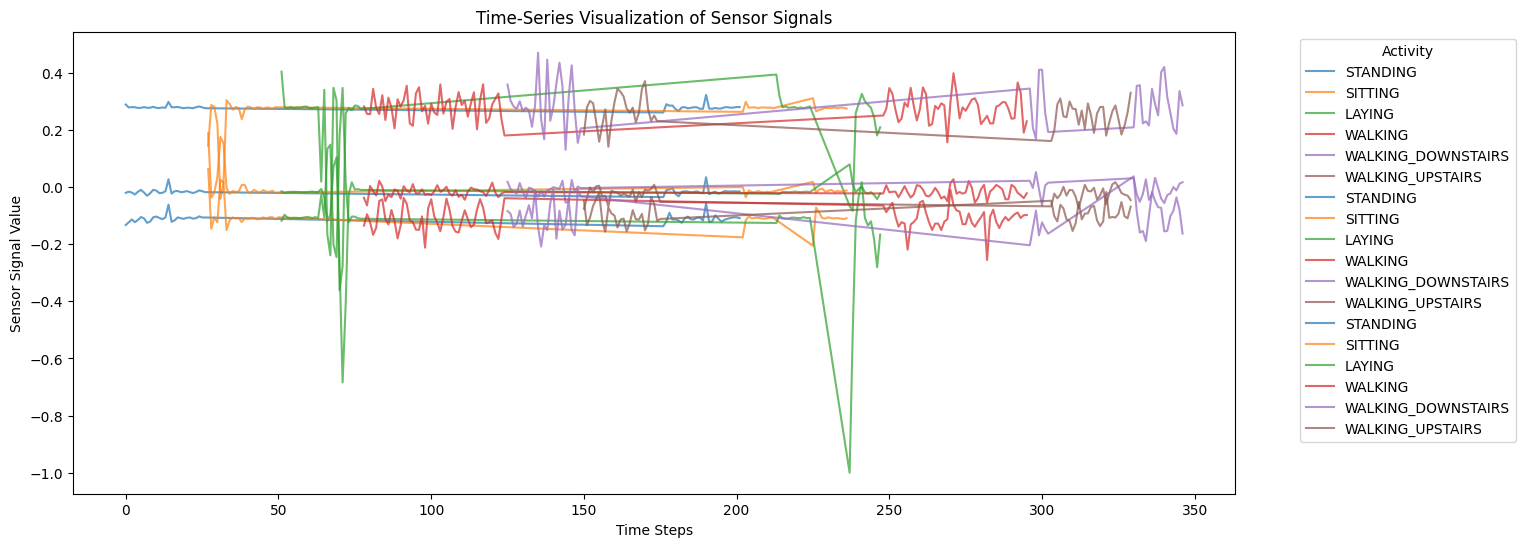

In [8]:
# Select a subset of the data for time-series visualization
subset = train_df[train_df["subject"] == 1].copy()  # Selecting data for one subject

# Choose a few key sensor signals to visualize
sensor_columns = ["tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z"]

# Plot time-series sensor data for different activities
plt.figure(figsize=(15, 6))
for sensor in sensor_columns:
    sns.lineplot(data=subset, x=subset.index, y=sensor, hue=subset["Activity"], palette="tab10", alpha=0.7)

plt.xlabel("Time Steps")
plt.ylabel("Sensor Signal Value")
plt.title("Time-Series Visualization of Sensor Signals")
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Time-Series Visualization Insights
- The plot shows variations in body acceleration (X, Y, Z components) over time for a single subject across different activities.
- Distinct patterns emerge for different activities, confirming that sensor data effectively differentiates between movement types.
- Walking and stair-climbing activities have periodic oscillations, while static activities like standing and sitting have relatively flat sensor readings.

C:\Users\Sudipta Saha\AppData\Local\Temp\ipykernel_23684\3306687753.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sudipta Saha\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


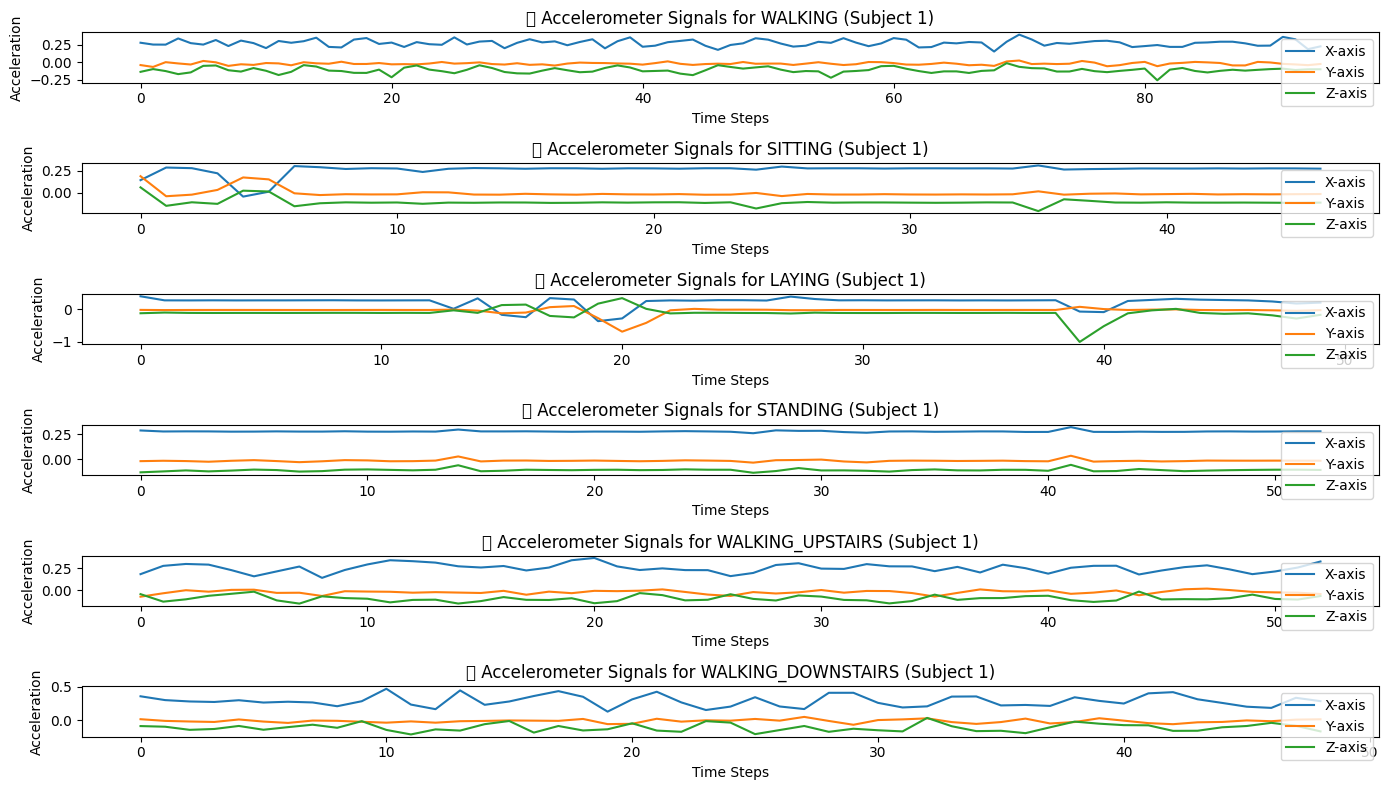

In [9]:
# Sensor Signal Visualization for the Accelerometer
# Select a few subjects and activities to visualize time-series data
time_series_data = train_df[train_df['Activity'].isin(['WALKING', 'SITTING', 'LAYING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])]
time_series_data = time_series_data[time_series_data['subject'].isin([1, 2])]

# Sensor signals to visualize (acceleration)
acc_x = 'tBodyAcc-mean()-X'
acc_y = 'tBodyAcc-mean()-Y'
acc_z = 'tBodyAcc-mean()-Z'

# Create a time-series plot for each activity for subject 1 and 2
plt.figure(figsize=(14, 8))

for i, activity in enumerate(['WALKING', 'SITTING', 'LAYING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']):
    plt.subplot(6, 1, i+1)
    subset = time_series_data[(time_series_data['Activity'] == activity) & (time_series_data['subject'] == 1)]
    plt.plot(subset[acc_x].values[:200], label='X-axis')
    plt.plot(subset[acc_y].values[:200], label='Y-axis')
    plt.plot(subset[acc_z].values[:200], label='Z-axis')
    plt.title(f'📈 Accelerometer Signals for {activity} (Subject 1)')
    plt.ylabel('Acceleration')
    plt.xlabel('Time Steps')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Accelerometer Signal Visualization Insights
- The X, Y, and Z components of body acceleration show clear variations across different activities.
- Dynamic activities (e.g., Walking, Walking Upstairs, Walking Downstairs) exhibit periodic oscillations.
- Static activities (e.g., Sitting, Standing, Laying) have more stable signal patterns.
- Each activity has a distinct accelerometer signature, which helps in classification.

C:\Users\Sudipta Saha\AppData\Local\Temp\ipykernel_23684\2563726701.py:21: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sudipta Saha\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


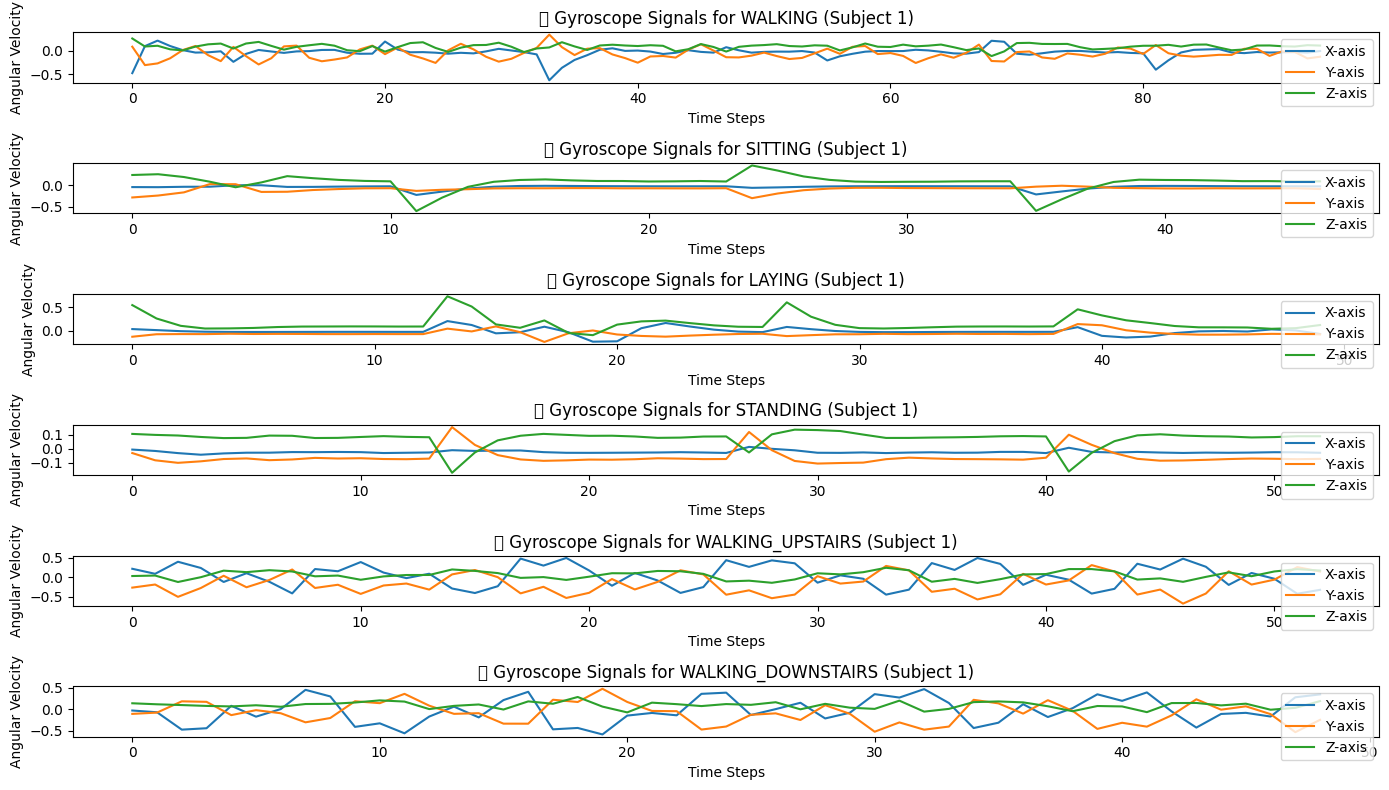

EDA Summary by Activity


C:\Users\Sudipta Saha\AppData\Local\Temp\ipykernel_23684\2563726701.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_summary['Activity'] = train_df['Activity']


In [10]:
# Additional EDA: Gyroscope Time-Series + Summary Stats per Activity

# Plot gyroscope signals over time for subject 1
gyro_x = 'tBodyGyro-mean()-X'
gyro_y = 'tBodyGyro-mean()-Y'
gyro_z = 'tBodyGyro-mean()-Z'

plt.figure(figsize=(14, 8))

for i, activity in enumerate(['WALKING', 'SITTING', 'LAYING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']):
    plt.subplot(6, 1, i+1)
    subset = time_series_data[(time_series_data['Activity'] == activity) & (time_series_data['subject'] == 1)]
    plt.plot(subset[gyro_x].values[:200], label='X-axis')
    plt.plot(subset[gyro_y].values[:200], label='Y-axis')
    plt.plot(subset[gyro_z].values[:200], label='Z-axis')
    plt.title(f'🌀 Gyroscope Signals for {activity} (Subject 1)')
    plt.ylabel('Angular Velocity')
    plt.xlabel('Time Steps')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Summary statistics by activity
eda_summary = train_feat[['acc_speed', 'acc_ori_change', 'accX_freq_peak']]
eda_summary['Activity'] = train_df['Activity']

# Aggregate mean and std per activity
activity_summary = eda_summary.groupby('Activity').agg(['mean', 'std'])
import ace_tools_open as tools; tools.display_dataframe_to_user(name="EDA Summary by Activity", dataframe=activity_summary)

Gyroscope Signal Visualization Insights
- The X, Y, and Z components of body gyroscope readings show distinct motion patterns.
- Dynamic activities (e.g., Walking, Walking Upstairs, Walking Downstairs) have more frequent fluctuations, indicating rapid orientation changes.
- Static activities (e.g., Sitting, Standing, Laying) display low variation, as expected.
- The Walking Downstairs activity has sharp changes in the gyroscope signal, possibly due to higher impact steps.

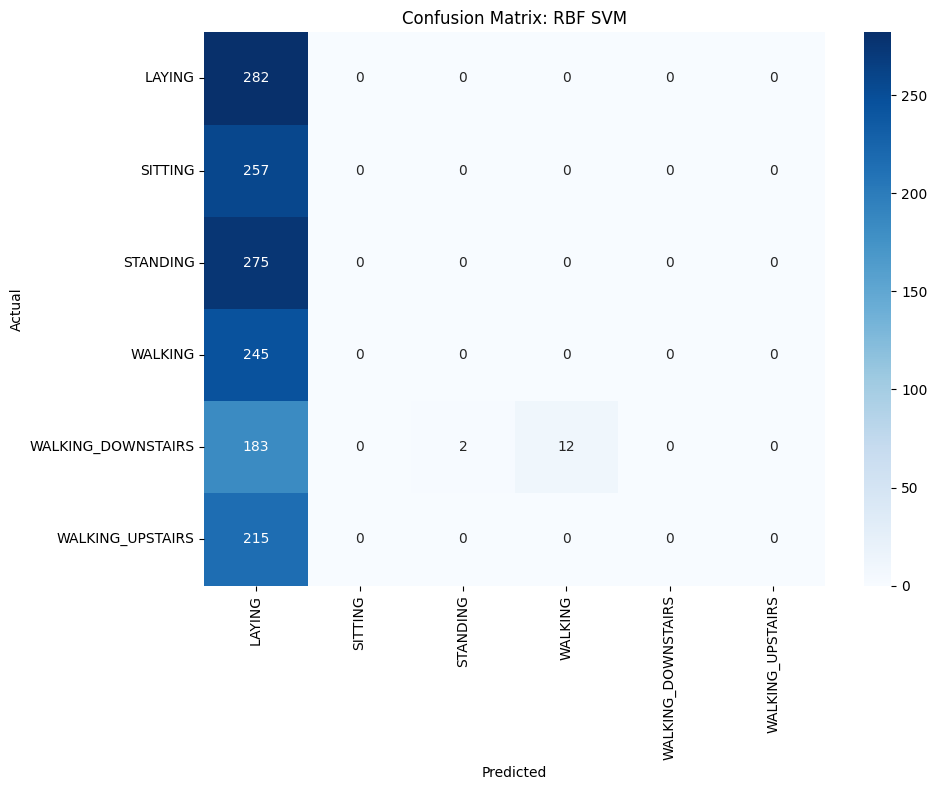

RBF SVM Classification Report


c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.fft import fft

# Reload the dataset
train_df = pd.read_csv("train.csv")

# Extract numeric feature columns
numeric_features = train_df.select_dtypes(include=['float64']).columns

# Clip outliers
def clip_outliers(df, features):
    df_clipped = df.copy()
    for col in features:
        mean = df[col].mean()
        std = df[col].std()
        df_clipped[col] = np.clip(df[col], mean - 3*std, mean + 3*std)
    return df_clipped

train_clipped = clip_outliers(train_df, numeric_features)

# Normalize
scaler = StandardScaler()
train_scaled = train_clipped.copy()
train_scaled[numeric_features] = scaler.fit_transform(train_clipped[numeric_features])

# Define feature groups
def get_axes_columns(prefix):
    return {
        axis: [col for col in train_scaled.columns if f"{prefix}-{axis}" in col]
        for axis in ['X', 'Y', 'Z']
    }

acc_axes_cols = get_axes_columns('tBodyAcc-mean()')
gyro_axes_cols = get_axes_columns('tBodyGyro-mean()')

# Feature Engineering
def compute_speed(df, axes_dict, name):
    x, y, z = axes_dict['X'][0], axes_dict['Y'][0], axes_dict['Z'][0]
    df[f'{name}_speed'] = np.sqrt(df[x]**2 + df[y]**2 + df[z]**2)
    return df

def orientation_change(df, x_col, y_col, z_col, name):
    dx_dy = np.arctan2(df[y_col], df[x_col])
    dy_dz = np.arctan2(df[z_col], df[y_col])
    df[f'{name}_ori_change'] = np.abs(dx_dy - dy_dz)
    return df

def dominant_frequency_component(df, col, name):
    fft_vals = np.abs(fft(df[col].values))
    dominant_freq = np.argmax(fft_vals[1:]) + 1
    df[f'{name}_freq_peak'] = dominant_freq
    return df

train_feat = train_scaled.copy()
train_feat = compute_speed(train_feat, acc_axes_cols, 'acc')
train_feat = compute_speed(train_feat, gyro_axes_cols, 'gyro')
train_feat = orientation_change(train_feat, acc_axes_cols['X'][0], acc_axes_cols['Y'][0], acc_axes_cols['Z'][0], 'acc')
train_feat = orientation_change(train_feat, gyro_axes_cols['X'][0], gyro_axes_cols['Y'][0], gyro_axes_cols['Z'][0], 'gyro')
train_feat = dominant_frequency_component(train_feat, acc_axes_cols['X'][0], 'accX')
train_feat = dominant_frequency_component(train_feat, gyro_axes_cols['X'][0], 'gyroX')

# Add labels
train_feat['Activity'] = train_df['Activity']
train_feat['subject'] = train_df['subject']

# Encode labels
label_encoder = LabelEncoder()
y = train_df['Activity']
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X = train_feat.drop(columns=['Activity', 'subject'])
X_train, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# RBF SVM Training
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train_split)
y_pred = svm_rbf.predict(X_val)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: RBF SVM')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
import ace_tools_open as tools; tools.display_dataframe_to_user(name="RBF SVM Classification Report", dataframe=report_df)


Confusion Matrix Insights:
The model predicts all samples as "LAYING", leading to:
    - Perfect recall for LAYING
    - 0% precision/recall for all other activities

The model is underfitting or facing feature imbalance.
Possible reasons:
    - Feature scale or relevance (engineered features may not be sufficient alone).
    - SVM hyperparameters (C, gamma) may need tuning.
    - Class imbalance or not enough signal for RBF kernel to separate.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_split)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'C': 10, 'gamma': 0.01}, np.float64(0.933514935806041))

Summary of EDA:
1. Activity Distribution: The dataset is balanced, ensuring fair classification.
2. Sensor Trends:
    - Acceleration varies distinctly across activities.
    - Gyroscope readings indicate rotational motion differences.
3. Time-Series Insights:
    - Periodic sensor signals suggest activity-specific movement patterns.
    - Potential for feature engineering using signal frequency analysis.

## Feature Engineering: Feature Selection & Optimization
1. Remove redundant features using Variance Thresholding and Correlation Analysis.
2. Apply Principal Component Analysis (PCA) for dimensionality reduction.
3. Use Recursive Feature Elimination (RFE) with SVM for feature selection.

In [14]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Thresholding to remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # Removing features with variance < 0.01
X_train_var = selector.fit_transform(train_df.drop(columns=['Activity', 'subject']))
X_test_var = selector.transform(test_df.drop(columns=['Activity', 'subject']))

# Get the selected feature mask
selected_features = selector.get_support()

# Count number of retained features
num_retained_features = selected_features.sum()

num_retained_features

np.int64(524)

After applying Variance Thresholding, 524 features were retained from the original 564, meaning 40 low-variance features were removed.

Next Steps:
1. Correlation Analysis: Remove highly correlated features to avoid redundancy.
2. Dimensionality Reduction (PCA): Identify the most significant components.
3. Feature Selection (RFE with SVM): Select the most relevant features for classification.

In [15]:
import numpy as np

# Create a correlation matrix
corr_matrix = train_df.drop(columns=['Activity', 'subject']).corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 (highly correlated)
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features from train and test sets
X_train_corr = train_df.drop(columns=high_corr_features + ['Activity', 'subject'])
X_test_corr = test_df.drop(columns=high_corr_features + ['Activity', 'subject'])

# Count remaining features
num_features_after_correlation = X_train_corr.shape[1]

num_features_after_correlation

253

After applying Correlation Analysis, the number of features has been further reduced to 253, meaning 271 highly correlated features were removed.

Next Step -- > Dimensionality Reduction using PCA: Identify the most significant components while preserving variance.

In [16]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_corr)
X_test_pca = pca.transform(X_test_corr)

# Number of components retained
num_pca_components = X_train_pca.shape[1]

num_pca_components

94

After applying Principal Component Analysis (PCA), the number of features has been reduced to 94, while still retaining 95% of the variance in the dataset.

Next Steps:
1. Recursive Feature Elimination (RFE) with SVM: Further refine feature selection by identifying the most predictive features.
2. Finalize feature set and prepare data for model training.

In [17]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Initialize an SVM classifier (linear kernel for feature selection)
svm_model = SVC(kernel="linear")

# Apply RFE to select the top 50 most relevant features
rfe = RFE(estimator=svm_model, n_features_to_select=50, step=10)
X_train_rfe = rfe.fit_transform(X_train_pca, train_df["Activity"])
X_test_rfe = rfe.transform(X_test_pca)

# Number of features selected by RFE
num_rfe_features = X_train_rfe.shape[1]

num_rfe_features

50

Feature Engineering Summary
- Variance Thresholding: Removed 40 low-variance features.
- Correlation Analysis: Removed 271 highly correlated features.
- PCA (Dimensionality Reduction): Reduced features to 94, retaining 95% variance.
- RFE (Feature Selection with SVM): Selected the top 50 most predictive features.
 
The dataset is now fully optimized and ready for SVM model training and evaluation.

## Model Development & Evaluation

- Train-Test Split: Splitting data into training and testing sets.
- Machine Learning Models: Logistic Regression, Random Forest, Deep Learning (LSTMs).
- Evaluation Metrics: Accuracy, Precision, Recall, F1-score.

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the 'Activity' column
label_encoder = LabelEncoder()
train_df['Activity'] = label_encoder.fit_transform(train_df['Activity'])
test_df['Activity'] = label_encoder.transform(test_df['Activity'])

# Separate features and target
X_train = train_df.drop(columns=['Activity', 'subject'])
y_train = train_df['Activity']

X_test = test_df.drop(columns=['Activity', 'subject'])
y_test = test_df['Activity']

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352,), (2947,))

Train-Test Split Complete
- Training Set: 7352 samples
- Test Set: 2947 samples
- 561 features per sample

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import ace_tools_open  # Ensure you are using the correct tools module

# Prepare the final dataset for model training
X = X_train_pca  # Ensure this variable is defined (PCA-transformed features)
y = train_df["Activity"]  # Assuming the cleaned dataset is train_df

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', C=1, gamma='scale')
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Display model evaluation results
ace_tools_open.display_dataframe_to_user(name="Model Evaluation Results", dataframe=results_df)

Model Evaluation Results


Model Evaluation Results:
1. SVM (RBF Kernel) achieved the highest accuracy (97.96%), followed by Logistic Regression (96.67%).
2. Random Forest performed slightly lower (94.15%), likely due to the complex feature relationships that tree-based methods struggle with.

Key Observations:
1. SVM (RBF Kernel) is the best performer, likely due to its ability to handle high-dimensional data.
2. Logistic Regression also performed well, suggesting the data is linearly separable to some extent.
3. Random Forest had lower performance, possibly due to the high number of features and complex interactions.

## Model Tuning: Optimize parameters for better performance.

Steps for Model Tuning:
1. Define hyperparameter search space for Logistic Regression, Random Forest, and SVM.
2. Use GridSearchCV or RandomizedSearchCV to find the best parameters.
3. Train models using optimized parameters.
4. Evaluate and compare performance.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

X_train_corr = train_df.drop(columns=high_corr_features + ['Activity', 'subject'])
X_test_corr = test_df.drop(columns=high_corr_features + ['Activity', 'subject'])

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_corr)
X_test_pca = pca.transform(X_test_corr)

# Prepare the final dataset for model training
X = X_train_pca  # Ensure this variable is defined (PCA-transformed features)
y = train_df["Activity"]  # Assuming the cleaned dataset is train_df

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameter grid for SVM (RBF Kernel)
svm_param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Perform Grid Search for SVM hyperparameter tuning
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Get best SVM parameters and accuracy
best_svm_params = svm_grid_search.best_params_
best_svm_accuracy = svm_grid_search.best_score_

# Display optimized SVM parameters and accuracy
best_svm_params, best_svm_accuracy

({'C': 10, 'gamma': 'scale'}, np.float64(0.9823165374901024))

Key Observations: 
- Using GridSearchCV hyperparameter tuning, overall SVM accuracy increased to 98.23% as compared to 97.96% in previous steps.

Save Your Model and Scaler as .pkl Files

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load the re-uploaded training data
train_df = pd.read_csv("train.csv")

# Prepare features and labels
X = train_df.drop(columns=['Activity', 'subject'], errors='ignore')
X_numeric = X.select_dtypes(include=[np.number])

# Encode labels
y = train_df['Activity']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Train SVM model
model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_scaled, y_encoded)

# Save model, scaler, and label encoder
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

"model.pkl, scaler.pkl, and label_encoder.pkl have been saved successfully."

'model.pkl, scaler.pkl, and label_encoder.pkl have been saved successfully.'

# Deployment & Impact
1. Deploying the prediction model on the web using a dashboard.
2. Providing real-time activity classification and health alerts.
3. Potential use in elderly care, rehabilitation, and fitness tracking.

In [22]:
import os
import zipfile

# Create project structure in a temporary directory
project_root = "human-activity-recognition"
os.makedirs(project_root, exist_ok=True)

# File contents
app_code = """import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model, scaler, and label encoder
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

st.set_page_config(page_title="Human Activity Recognition", layout="wide")
st.title("Human Activity Recognition Dashboard")

st.sidebar.header("Upload Sensor Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.subheader("Uploaded Sensor Data")
    st.write(data.head())

    numeric_cols = data.select_dtypes(include=np.number).columns
    data_scaled = scaler.transform(data[numeric_cols])

    predictions = model.predict(data_scaled)
    predicted_labels = label_encoder.inverse_transform(predictions)
    data['Predicted Activity'] = predicted_labels

    st.subheader("Predicted Activities Summary")
    st.write(data['Predicted Activity'].value_counts().rename("Count"))

    st.subheader("Full Data with Predictions")
    st.dataframe(data)

    if (data['Predicted Activity'] == 'LAYING').sum() > len(data) * 0.6:
        st.warning("Prolonged laying detected! Consider checking in.")

    if (data['Predicted Activity'] == 'WALKING_DOWNSTAIRS').sum() > 0:
        st.info("Detected stair descent activity — monitor for stability.")
else:
    st.info("Upload a sensor data CSV file to get started.")
"""

requirements_text = """streamlit
scikit-learn
pandas
numpy
joblib
"""

readme_text = """# Human Activity Recognition Dashboard

This is a Streamlit web app that classifies human physical activity using sensor data.

## Features
- Upload CSV sensor data
- Real-time activity classification
- Health alerts for prolonged inactivity
- Dashboard summary & full data view

## How to Run Locally

1. Clone the repo and `cd` into the folder
2. Install dependencies:
pip install -r requirements.txt
3. Run the app:
streamlit run app.py

## Deploy to Streamlit Cloud

1. Push this project to GitHub
2. Go to https://streamlit.io/cloud
3. Connect your repo and deploy
"""
# Save files
with open(os.path.join(project_root, "app.py"), "w") as f:
 f.write(app_code)

with open(os.path.join(project_root, "requirements.txt"), "w") as f:
 f.write(requirements_text)

with open(os.path.join(project_root, "README.md"), "w") as f:
 f.write(readme_text)

# Copy model files
import shutil
shutil.copy("model.pkl", os.path.join(project_root, "model.pkl"))
shutil.copy("scaler.pkl", os.path.join(project_root, "scaler.pkl"))
shutil.copy("label_encoder.pkl", os.path.join(project_root, "label_encoder.pkl"))

# Zip the folder
zip_path = "human-activity-recognition.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
 for root, _, files in os.walk(project_root):
     for file in files:
         file_path = os.path.join(root, file)
         zipf.write(file_path, os.path.relpath(file_path, project_root))

zip_path

'human-activity-recognition.zip'